In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
print(max(labels))
print(min(labels))

11.0
1.0


In [5]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [6]:
result_.shape

(1980, 256)

In [7]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

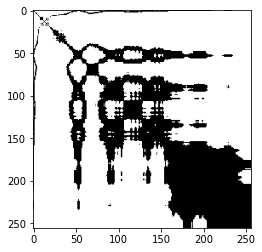

In [8]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [19]:
learning_rate = 3e-7
optimizer='Adam'
loss='binary_crossentropy'
image_size = 256 #1024, 256
dimension = 4 # ...

In [20]:
batch_size = 10
epochs = 5000

In [21]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent
from keras import backend as K
import tensorflow as tf
X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
with mirrored_strategy.scope():
    autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)
    hist = autoencoder.train(X_train,batch_size,epochs,X_test)
#     feature = autoencoder.feature_extract(X_scaled)
#     print(feature)
#     print(feature.shape)
# with tf.device('/cpu:0'):
#     autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)
#     hist = autoencoder.train(X_train,batch_size,epochs,X_test)
#     feature = autoencoder.feature_extract(X_scaled)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 128)     1280      
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6

Epoch 16/5000
149/149 [==============================] - ETA: 0s - loss: 0.6909
Epoch 00016: val_loss improved from 0.69097 to 0.69077, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6909 - val_loss: 0.6908
Epoch 17/5000
149/149 [==============================] - ETA: 0s - loss: 0.6907
Epoch 00017: val_loss improved from 0.69077 to 0.69056, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6907 - val_loss: 0.6906
Epoch 18/5000
149/149 [==============================] - ETA: 0s - loss: 0.6904
Epoch 00018: val_loss improved from 0.69056 to 0.69035, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6904 - val_loss: 0.6903
Epoch 19/5000
149/149 [==============================] - ETA: 0s - loss: 0.6902
Epoch 00019: val_loss improved from 0.69035 to 0.69012, saving model to insectWing_dimension_4.h5
149/149 [===

149/149 [==============================] - ETA: 0s - loss: 0.6814
Epoch 00046: val_loss improved from 0.68168 to 0.68127, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6814 - val_loss: 0.6813
Epoch 47/5000
149/149 [==============================] - ETA: 0s - loss: 0.6810
Epoch 00047: val_loss improved from 0.68127 to 0.68085, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6810 - val_loss: 0.6808
Epoch 48/5000
149/149 [==============================] - ETA: 0s - loss: 0.6806
Epoch 00048: val_loss improved from 0.68085 to 0.68042, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6806 - val_loss: 0.6804
Epoch 49/5000
149/149 [==============================] - ETA: 0s - loss: 0.6801
Epoch 00049: val_loss improved from 0.68042 to 0.67999, saving model to insectWing_dimension_4.h5
149/149 [=================

149/149 [==============================] - ETA: 0s - loss: 0.6661
Epoch 00076: val_loss improved from 0.66640 to 0.66578, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6661 - val_loss: 0.6658
Epoch 77/5000
149/149 [==============================] - ETA: 0s - loss: 0.6654
Epoch 00077: val_loss improved from 0.66578 to 0.66516, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6654 - val_loss: 0.6652
Epoch 78/5000
149/149 [==============================] - ETA: 0s - loss: 0.6648
Epoch 00078: val_loss improved from 0.66516 to 0.66453, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 111ms/step - loss: 0.6648 - val_loss: 0.6645
Epoch 79/5000
149/149 [==============================] - ETA: 0s - loss: 0.6642
Epoch 00079: val_loss improved from 0.66453 to 0.66389, saving model to insectWing_dimension_4.h5
149/149 [=================

149/149 [==============================] - ETA: 0s - loss: 0.6454
Epoch 00106: val_loss improved from 0.64566 to 0.64493, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6454 - val_loss: 0.6449
Epoch 107/5000
149/149 [==============================] - ETA: 0s - loss: 0.6447
Epoch 00107: val_loss improved from 0.64493 to 0.64419, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6447 - val_loss: 0.6442
Epoch 108/5000
149/149 [==============================] - ETA: 0s - loss: 0.6439
Epoch 00108: val_loss improved from 0.64419 to 0.64346, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6439 - val_loss: 0.6435
Epoch 109/5000
149/149 [==============================] - ETA: 0s - loss: 0.6432
Epoch 00109: val_loss improved from 0.64346 to 0.64272, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6244
Epoch 00136: val_loss improved from 0.62461 to 0.62400, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6244 - val_loss: 0.6240
Epoch 137/5000
149/149 [==============================] - ETA: 0s - loss: 0.6238
Epoch 00137: val_loss improved from 0.62400 to 0.62340, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6238 - val_loss: 0.6234
Epoch 138/5000
149/149 [==============================] - ETA: 0s - loss: 0.6232
Epoch 00138: val_loss improved from 0.62340 to 0.62281, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6232 - val_loss: 0.6228
Epoch 139/5000
149/149 [==============================] - ETA: 0s - loss: 0.6226
Epoch 00139: val_loss improved from 0.62281 to 0.62223, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6123
Epoch 00166: val_loss improved from 0.61235 to 0.61219, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6123 - val_loss: 0.6122
Epoch 167/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6122
Epoch 00167: val_loss improved from 0.61219 to 0.61205, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6122 - val_loss: 0.6121
Epoch 168/5000
149/149 [==============================] - ETA: 0s - loss: 0.6121
Epoch 00168: val_loss improved from 0.61205 to 0.61193, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6121 - val_loss: 0.6119
Epoch 169/5000
149/149 [==============================] - ETA: 0s - loss: 0.6119
Epoch 00169: val_loss improved from 0.61193 to 0.61182, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6113
Epoch 00196: val_loss improved from 0.61121 to 0.61121, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6113 - val_loss: 0.6112
Epoch 197/5000
149/149 [==============================] - ETA: 0s - loss: 0.6113
Epoch 00197: val_loss improved from 0.61121 to 0.61120, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6113 - val_loss: 0.6112
Epoch 198/5000
149/149 [==============================] - ETA: 0s - loss: 0.6113
Epoch 00198: val_loss improved from 0.61120 to 0.61120, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6113 - val_loss: 0.6112
Epoch 199/5000
149/149 [==============================] - ETA: 0s - loss: 0.6113
Epoch 00199: val_loss improved from 0.61120 to 0.61119, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6111
Epoch 00226: val_loss improved from 0.61105 to 0.61104, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6111 - val_loss: 0.6110
Epoch 227/5000
149/149 [==============================] - ETA: 0s - loss: 0.6111
Epoch 00227: val_loss improved from 0.61104 to 0.61104, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6111 - val_loss: 0.6110
Epoch 228/5000
149/149 [==============================] - ETA: 0s - loss: 0.6111
Epoch 00228: val_loss improved from 0.61104 to 0.61103, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6111 - val_loss: 0.6110
Epoch 229/5000
149/149 [==============================] - ETA: 0s - loss: 0.6111
Epoch 00229: val_loss improved from 0.61103 to 0.61102, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6109
Epoch 00256: val_loss improved from 0.61085 to 0.61085, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6109 - val_loss: 0.6108
Epoch 257/5000
149/149 [==============================] - ETA: 0s - loss: 0.6109
Epoch 00257: val_loss improved from 0.61085 to 0.61084, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6109 - val_loss: 0.6108
Epoch 258/5000
149/149 [==============================] - ETA: 0s - loss: 0.6109
Epoch 00258: val_loss improved from 0.61084 to 0.61083, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6109 - val_loss: 0.6108
Epoch 259/5000
149/149 [==============================] - ETA: 0s - loss: 0.6109
Epoch 00259: val_loss improved from 0.61083 to 0.61083, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6107
Epoch 00286: val_loss improved from 0.61066 to 0.61066, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6107 - val_loss: 0.6107
Epoch 287/5000
149/149 [==============================] - ETA: 0s - loss: 0.6107
Epoch 00287: val_loss improved from 0.61066 to 0.61065, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6107 - val_loss: 0.6107
Epoch 288/5000
149/149 [==============================] - ETA: 0s - loss: 0.6107
Epoch 00288: val_loss improved from 0.61065 to 0.61065, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6107 - val_loss: 0.6106
Epoch 289/5000
149/149 [==============================] - ETA: 0s - loss: 0.6107
Epoch 00289: val_loss improved from 0.61065 to 0.61064, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6105
Epoch 00316: val_loss improved from 0.61049 to 0.61049, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6105 - val_loss: 0.6105
Epoch 317/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6105
Epoch 00317: val_loss improved from 0.61049 to 0.61048, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6105 - val_loss: 0.6105
Epoch 318/5000
149/149 [==============================] - ETA: 0s - loss: 0.6104
Epoch 00318: val_loss improved from 0.61048 to 0.61048, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6104 - val_loss: 0.6105
Epoch 319/5000
149/149 [==============================] - ETA: 0s - loss: 0.6104
Epoch 00319: val_loss improved from 0.61048 to 0.61047, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6103
Epoch 00346: val_loss improved from 0.61035 to 0.61034, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6103 - val_loss: 0.6103
Epoch 347/5000
149/149 [==============================] - ETA: 0s - loss: 0.6102
Epoch 00347: val_loss improved from 0.61034 to 0.61034, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6102 - val_loss: 0.6103
Epoch 348/5000
149/149 [==============================] - ETA: 0s - loss: 0.6102
Epoch 00348: val_loss improved from 0.61034 to 0.61033, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6102 - val_loss: 0.6103
Epoch 349/5000
149/149 [==============================] - ETA: 0s - loss: 0.6102
Epoch 00349: val_loss improved from 0.61033 to 0.61033, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6101
Epoch 00376: val_loss improved from 0.61022 to 0.61022, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6101 - val_loss: 0.6102
Epoch 377/5000
149/149 [==============================] - ETA: 0s - loss: 0.6101
Epoch 00377: val_loss improved from 0.61022 to 0.61022, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6101 - val_loss: 0.6102
Epoch 378/5000
149/149 [==============================] - ETA: 0s - loss: 0.6100
Epoch 00378: val_loss improved from 0.61022 to 0.61021, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6100 - val_loss: 0.6102
Epoch 379/5000
149/149 [==============================] - ETA: 0s - loss: 0.6100
Epoch 00379: val_loss improved from 0.61021 to 0.61021, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6099
Epoch 00406: val_loss improved from 0.61012 to 0.61011, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6099 - val_loss: 0.6101
Epoch 407/5000
149/149 [==============================] - ETA: 0s - loss: 0.6099
Epoch 00407: val_loss improved from 0.61011 to 0.61011, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6099 - val_loss: 0.6101
Epoch 408/5000
149/149 [==============================] - ETA: 0s - loss: 0.6099
Epoch 00408: val_loss improved from 0.61011 to 0.61011, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6099 - val_loss: 0.6101
Epoch 409/5000
149/149 [==============================] - ETA: 0s - loss: 0.6099
Epoch 00409: val_loss improved from 0.61011 to 0.61010, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6097
Epoch 00436: val_loss improved from 0.61002 to 0.61002, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6097 - val_loss: 0.6100
Epoch 437/5000
149/149 [==============================] - ETA: 0s - loss: 0.6097
Epoch 00437: val_loss improved from 0.61002 to 0.61002, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6097 - val_loss: 0.6100
Epoch 438/5000
149/149 [==============================] - ETA: 0s - loss: 0.6097
Epoch 00438: val_loss improved from 0.61002 to 0.61001, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 111ms/step - loss: 0.6097 - val_loss: 0.6100
Epoch 439/5000
149/149 [==============================] - ETA: 0s - loss: 0.6097
Epoch 00439: val_loss improved from 0.61001 to 0.61001, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6095
Epoch 00466: val_loss improved from 0.60993 to 0.60993, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6095 - val_loss: 0.6099
Epoch 467/5000
149/149 [==============================] - ETA: 0s - loss: 0.6095
Epoch 00467: val_loss improved from 0.60993 to 0.60993, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6095 - val_loss: 0.6099
Epoch 468/5000
149/149 [==============================] - ETA: 0s - loss: 0.6095
Epoch 00468: val_loss improved from 0.60993 to 0.60993, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6095 - val_loss: 0.6099
Epoch 469/5000
149/149 [==============================] - ETA: 0s - loss: 0.6095
Epoch 00469: val_loss improved from 0.60993 to 0.60992, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6094
Epoch 00496: val_loss improved from 0.60985 to 0.60984, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 106ms/step - loss: 0.6094 - val_loss: 0.6098
Epoch 497/5000
149/149 [==============================] - ETA: 0s - loss: 0.6094
Epoch 00497: val_loss improved from 0.60984 to 0.60984, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6094 - val_loss: 0.6098
Epoch 498/5000
149/149 [==============================] - ETA: 0s - loss: 0.6094
Epoch 00498: val_loss improved from 0.60984 to 0.60984, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6094 - val_loss: 0.6098
Epoch 499/5000
149/149 [==============================] - ETA: 0s - loss: 0.6094
Epoch 00499: val_loss improved from 0.60984 to 0.60983, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6092
Epoch 00526: val_loss improved from 0.60976 to 0.60975, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6092 - val_loss: 0.6098
Epoch 527/5000
149/149 [==============================] - ETA: 0s - loss: 0.6092
Epoch 00527: val_loss improved from 0.60975 to 0.60975, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6092 - val_loss: 0.6098
Epoch 528/5000
149/149 [==============================] - ETA: 0s - loss: 0.6092
Epoch 00528: val_loss improved from 0.60975 to 0.60975, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6092 - val_loss: 0.6097
Epoch 529/5000
149/149 [==============================] - ETA: 0s - loss: 0.6092
Epoch 00529: val_loss improved from 0.60975 to 0.60975, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6091
Epoch 00556: val_loss improved from 0.60968 to 0.60967, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6091 - val_loss: 0.6097
Epoch 557/5000
149/149 [==============================] - ETA: 0s - loss: 0.6090
Epoch 00557: val_loss improved from 0.60967 to 0.60967, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6090 - val_loss: 0.6097
Epoch 558/5000
149/149 [==============================] - ETA: 0s - loss: 0.6090
Epoch 00558: val_loss improved from 0.60967 to 0.60967, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6090 - val_loss: 0.6097
Epoch 559/5000
149/149 [==============================] - ETA: 0s - loss: 0.6090
Epoch 00559: val_loss improved from 0.60967 to 0.60967, saving model to insectWing_dimension_4.h5
149/149 [==============

148/149 [============================>.] - ETA: 0s - loss: 0.6089
Epoch 00586: val_loss improved from 0.60960 to 0.60959, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6089 - val_loss: 0.6096
Epoch 587/5000
149/149 [==============================] - ETA: 0s - loss: 0.6089
Epoch 00587: val_loss improved from 0.60959 to 0.60959, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6089 - val_loss: 0.6096
Epoch 588/5000
149/149 [==============================] - ETA: 0s - loss: 0.6089
Epoch 00588: val_loss improved from 0.60959 to 0.60959, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6089 - val_loss: 0.6096
Epoch 589/5000
149/149 [==============================] - ETA: 0s - loss: 0.6089
Epoch 00589: val_loss improved from 0.60959 to 0.60959, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6087- ETA: 0s - loss: 0.
Epoch 00616: val_loss improved from 0.60952 to 0.60951, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6087 - val_loss: 0.6095
Epoch 617/5000
149/149 [==============================] - ETA: 0s - loss: 0.6087
Epoch 00617: val_loss improved from 0.60951 to 0.60951, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6087 - val_loss: 0.6095
Epoch 618/5000
149/149 [==============================] - ETA: 0s - loss: 0.6087
Epoch 00618: val_loss improved from 0.60951 to 0.60951, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6087 - val_loss: 0.6095
Epoch 619/5000
149/149 [==============================] - ETA: 0s - loss: 0.6087
Epoch 00619: val_loss improved from 0.60951 to 0.60951, saving model to insectWing_dimension_4.h5
149

149/149 [==============================] - ETA: 0s - loss: 0.6086
Epoch 00646: val_loss improved from 0.60944 to 0.60944, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6086 - val_loss: 0.6094
Epoch 647/5000
149/149 [==============================] - ETA: 0s - loss: 0.6086
Epoch 00647: val_loss improved from 0.60944 to 0.60943, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6086 - val_loss: 0.6094
Epoch 648/5000
149/149 [==============================] - ETA: 0s - loss: 0.6086
Epoch 00648: val_loss improved from 0.60943 to 0.60943, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 106ms/step - loss: 0.6086 - val_loss: 0.6094
Epoch 649/5000
149/149 [==============================] - ETA: 0s - loss: 0.6086
Epoch 00649: val_loss improved from 0.60943 to 0.60943, saving model to insectWing_dimension_4.h5
149/149 [==============

Epoch 677/5000
149/149 [==============================] - ETA: 0s - loss: 0.6084
Epoch 00677: val_loss improved from 0.60937 to 0.60936, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6084 - val_loss: 0.6094
Epoch 678/5000
149/149 [==============================] - ETA: 0s - loss: 0.6084
Epoch 00678: val_loss improved from 0.60936 to 0.60936, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6084 - val_loss: 0.6094
Epoch 679/5000
149/149 [==============================] - ETA: 0s - loss: 0.6084
Epoch 00679: val_loss improved from 0.60936 to 0.60936, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6084 - val_loss: 0.6094
Epoch 680/5000
149/149 [==============================] - ETA: 0s - loss: 0.6084
Epoch 00680: val_loss improved from 0.60936 to 0.60936, saving model to insectWing_dimension_4.h5
149/149 

Epoch 708/5000
149/149 [==============================] - ETA: 0s - loss: 0.6083
Epoch 00708: val_loss improved from 0.60930 to 0.60930, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 111ms/step - loss: 0.6083 - val_loss: 0.6093
Epoch 709/5000
149/149 [==============================] - ETA: 0s - loss: 0.6083
Epoch 00709: val_loss improved from 0.60930 to 0.60930, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6083 - val_loss: 0.6093
Epoch 710/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6083
Epoch 00710: val_loss improved from 0.60930 to 0.60930, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6083 - val_loss: 0.6093
Epoch 711/5000
149/149 [==============================] - ETA: 0s - loss: 0.6083
Epoch 00711: val_loss improved from 0.60930 to 0.60929, saving model to insectWing_dimension_4.h5
149/149 

149/149 [==============================] - ETA: 0s - loss: 0.6081
Epoch 00738: val_loss did not improve from 0.60923
149/149 [==============================] - 17s 111ms/step - loss: 0.6081 - val_loss: 0.6092
Epoch 739/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6081
Epoch 00739: val_loss improved from 0.60923 to 0.60923, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6081 - val_loss: 0.6092
Epoch 740/5000
149/149 [==============================] - ETA: 0s - loss: 0.6081
Epoch 00740: val_loss improved from 0.60923 to 0.60923, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6081 - val_loss: 0.6092
Epoch 741/5000
149/149 [==============================] - ETA: 0s - loss: 0.6081
Epoch 00741: val_loss improved from 0.60923 to 0.60923, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.60

Epoch 769/5000
149/149 [==============================] - ETA: 0s - loss: 0.6079
Epoch 00769: val_loss improved from 0.60917 to 0.60917, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6079 - val_loss: 0.6092
Epoch 770/5000
149/149 [==============================] - ETA: 0s - loss: 0.6079
Epoch 00770: val_loss improved from 0.60917 to 0.60916, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6079 - val_loss: 0.6092
Epoch 771/5000
149/149 [==============================] - ETA: 0s - loss: 0.6079
Epoch 00771: val_loss improved from 0.60916 to 0.60916, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6079 - val_loss: 0.6092
Epoch 772/5000
149/149 [==============================] - ETA: 0s - loss: 0.6079
Epoch 00772: val_loss improved from 0.60916 to 0.60916, saving model to insectWing_dimension_4.h5
149/149 

Epoch 800/5000
149/149 [==============================] - ETA: 0s - loss: 0.6078
Epoch 00800: val_loss improved from 0.60910 to 0.60910, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6078 - val_loss: 0.6091
Epoch 801/5000
149/149 [==============================] - ETA: 0s - loss: 0.6078
Epoch 00801: val_loss improved from 0.60910 to 0.60909, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6078 - val_loss: 0.6091
Epoch 802/5000
149/149 [==============================] - ETA: 0s - loss: 0.6078
Epoch 00802: val_loss improved from 0.60909 to 0.60909, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6078 - val_loss: 0.6091
Epoch 803/5000
149/149 [==============================] - ETA: 0s - loss: 0.6078
Epoch 00803: val_loss improved from 0.60909 to 0.60909, saving model to insectWing_dimension_4.h5
149/149 

149/149 [==============================] - ETA: 0s - loss: 0.6076
Epoch 00830: val_loss improved from 0.60903 to 0.60903, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 111ms/step - loss: 0.6076 - val_loss: 0.6090
Epoch 831/5000
149/149 [==============================] - ETA: 0s - loss: 0.6076
Epoch 00831: val_loss improved from 0.60903 to 0.60902, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 113ms/step - loss: 0.6076 - val_loss: 0.6090
Epoch 832/5000
149/149 [==============================] - ETA: 0s - loss: 0.6076
Epoch 00832: val_loss improved from 0.60902 to 0.60902, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6076 - val_loss: 0.6090
Epoch 833/5000
149/149 [==============================] - ETA: 0s - loss: 0.6076
Epoch 00833: val_loss improved from 0.60902 to 0.60902, saving model to insectWing_dimension_4.h5
149/149 [==============

149/149 [==============================] - ETA: 0s - loss: 0.6075
Epoch 00860: val_loss improved from 0.60896 to 0.60896, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6075 - val_loss: 0.6090
Epoch 861/5000
149/149 [==============================] - ETA: 0s - loss: 0.6075
Epoch 00861: val_loss improved from 0.60896 to 0.60895, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6075 - val_loss: 0.6090
Epoch 862/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6075
Epoch 00862: val_loss improved from 0.60895 to 0.60895, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6075 - val_loss: 0.6090
Epoch 863/5000
149/149 [==============================] - ETA: 0s - loss: 0.6075
Epoch 00863: val_loss improved from 0.60895 to 0.60895, saving model to insectWing_dimension_4.h5
149/149 [==============

Epoch 891/5000
149/149 [==============================] - ETA: 0s - loss: 0.6073
Epoch 00891: val_loss did not improve from 0.60889
149/149 [==============================] - 16s 108ms/step - loss: 0.6073 - val_loss: 0.6089
Epoch 892/5000
149/149 [==============================] - ETA: 0s - loss: 0.6073
Epoch 00892: val_loss improved from 0.60889 to 0.60889, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6073 - val_loss: 0.6089
Epoch 893/5000
149/149 [==============================] - ETA: 0s - loss: 0.6073
Epoch 00893: val_loss improved from 0.60889 to 0.60889, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6073 - val_loss: 0.6089
Epoch 894/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6074
Epoch 00894: val_loss improved from 0.60889 to 0.60888, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/st

Epoch 922/5000
149/149 [==============================] - ETA: 0s - loss: 0.6072
Epoch 00922: val_loss improved from 0.60883 to 0.60883, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6072 - val_loss: 0.6088
Epoch 923/5000
149/149 [==============================] - ETA: 0s - loss: 0.6072
Epoch 00923: val_loss improved from 0.60883 to 0.60883, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6072 - val_loss: 0.6088
Epoch 924/5000
149/149 [==============================] - ETA: 0s - loss: 0.6072
Epoch 00924: val_loss improved from 0.60883 to 0.60882, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6072 - val_loss: 0.6088
Epoch 925/5000
149/149 [==============================] - ETA: 0s - loss: 0.6072
Epoch 00925: val_loss improved from 0.60882 to 0.60882, saving model to insectWing_dimension_4.h5
149/149 

Epoch 953/5000
149/149 [==============================] - ETA: 0s - loss: 0.6071
Epoch 00953: val_loss did not improve from 0.60878
149/149 [==============================] - 16s 107ms/step - loss: 0.6071 - val_loss: 0.6088
Epoch 954/5000
149/149 [==============================] - ETA: 0s - loss: 0.6071
Epoch 00954: val_loss improved from 0.60878 to 0.60878, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6071 - val_loss: 0.6088
Epoch 955/5000
149/149 [==============================] - ETA: 0s - loss: 0.6071
Epoch 00955: val_loss improved from 0.60878 to 0.60877, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6071 - val_loss: 0.6088
Epoch 956/5000
149/149 [==============================] - ETA: 0s - loss: 0.6071
Epoch 00956: val_loss improved from 0.60877 to 0.60877, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/st

Epoch 984/5000
149/149 [==============================] - ETA: 0s - loss: 0.6069
Epoch 00984: val_loss improved from 0.60873 to 0.60873, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6069 - val_loss: 0.6087
Epoch 985/5000
149/149 [==============================] - ETA: 0s - loss: 0.6069- ETA: 0s - loss: 
Epoch 00985: val_loss improved from 0.60873 to 0.60873, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6069 - val_loss: 0.6087
Epoch 986/5000
149/149 [==============================] - ETA: 0s - loss: 0.6069
Epoch 00986: val_loss improved from 0.60873 to 0.60872, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 113ms/step - loss: 0.6069 - val_loss: 0.6087
Epoch 987/5000
149/149 [==============================] - ETA: 0s - loss: 0.6069
Epoch 00987: val_loss improved from 0.60872 to 0.60872, saving model to insectWing_dimen

Epoch 1016/5000
149/149 [==============================] - ETA: 0s - loss: 0.6068
Epoch 01016: val_loss improved from 0.60869 to 0.60869, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6068 - val_loss: 0.6087
Epoch 1017/5000
149/149 [==============================] - ETA: 0s - loss: 0.6068
Epoch 01017: val_loss improved from 0.60869 to 0.60868, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6068 - val_loss: 0.6087
Epoch 1018/5000
149/149 [==============================] - ETA: 0s - loss: 0.6068
Epoch 01018: val_loss improved from 0.60868 to 0.60868, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6068 - val_loss: 0.6087
Epoch 1019/5000
149/149 [==============================] - ETA: 0s - loss: 0.6068
Epoch 01019: val_loss improved from 0.60868 to 0.60868, saving model to insectWing_dimension_4.h5
149/

Epoch 1047/5000
149/149 [==============================] - ETA: 0s - loss: 0.6067
Epoch 01047: val_loss improved from 0.60864 to 0.60864, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6067 - val_loss: 0.6086
Epoch 1048/5000
149/149 [==============================] - ETA: 0s - loss: 0.6067
Epoch 01048: val_loss improved from 0.60864 to 0.60864, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6067 - val_loss: 0.6086
Epoch 1049/5000
149/149 [==============================] - ETA: 0s - loss: 0.6067
Epoch 01049: val_loss improved from 0.60864 to 0.60864, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6067 - val_loss: 0.6086
Epoch 1050/5000
149/149 [==============================] - ETA: 0s - loss: 0.6067
Epoch 01050: val_loss improved from 0.60864 to 0.60864, saving model to insectWing_dimension_4.h5
149/

Epoch 1078/5000
149/149 [==============================] - ETA: 0s - loss: 0.6066
Epoch 01078: val_loss improved from 0.60861 to 0.60861, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 112ms/step - loss: 0.6066 - val_loss: 0.6086
Epoch 1079/5000
149/149 [==============================] - ETA: 0s - loss: 0.6066
Epoch 01079: val_loss improved from 0.60861 to 0.60861, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6066 - val_loss: 0.6086
Epoch 1080/5000
149/149 [==============================] - ETA: 0s - loss: 0.6066
Epoch 01080: val_loss did not improve from 0.60861
149/149 [==============================] - 16s 108ms/step - loss: 0.6066 - val_loss: 0.6086
Epoch 1081/5000
149/149 [==============================] - ETA: 0s - loss: 0.6066
Epoch 01081: val_loss improved from 0.60861 to 0.60860, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109m

Epoch 1110/5000
149/149 [==============================] - ETA: 0s - loss: 0.6065
Epoch 01110: val_loss did not improve from 0.60857
149/149 [==============================] - 16s 110ms/step - loss: 0.6065 - val_loss: 0.6086
Epoch 1111/5000
149/149 [==============================] - ETA: 0s - loss: 0.6065- ETA: 0s - loss
Epoch 01111: val_loss improved from 0.60857 to 0.60857, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6065 - val_loss: 0.6086
Epoch 1112/5000
149/149 [==============================] - ETA: 0s - loss: 0.6065
Epoch 01112: val_loss improved from 0.60857 to 0.60857, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6065 - val_loss: 0.6086
Epoch 1113/5000
149/149 [==============================] - ETA: 0s - loss: 0.6065
Epoch 01113: val_loss improved from 0.60857 to 0.60857, saving model to insectWing_dimension_4.h5
149/149 [==========================

149/149 [==============================] - ETA: 0s - loss: 0.6064
Epoch 01141: val_loss did not improve from 0.60853
149/149 [==============================] - 16s 110ms/step - loss: 0.6064 - val_loss: 0.6085
Epoch 1142/5000
149/149 [==============================] - ETA: 0s - loss: 0.6064
Epoch 01142: val_loss did not improve from 0.60853
149/149 [==============================] - 16s 110ms/step - loss: 0.6064 - val_loss: 0.6085
Epoch 1143/5000
149/149 [==============================] - ETA: 0s - loss: 0.6064
Epoch 01143: val_loss improved from 0.60853 to 0.60853, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6064 - val_loss: 0.6085
Epoch 1144/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6063
Epoch 01144: val_loss improved from 0.60853 to 0.60853, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6064 - val_loss: 0.6085
Epoch 1145/5000
149/14

Epoch 1173/5000
149/149 [==============================] - ETA: 0s - loss: 0.6063
Epoch 01173: val_loss did not improve from 0.60850
149/149 [==============================] - 16s 107ms/step - loss: 0.6063 - val_loss: 0.6085
Epoch 1174/5000
149/149 [==============================] - ETA: 0s - loss: 0.6063
Epoch 01174: val_loss improved from 0.60850 to 0.60850, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6063 - val_loss: 0.6085
Epoch 1175/5000
149/149 [==============================] - ETA: 0s - loss: 0.6063
Epoch 01175: val_loss improved from 0.60850 to 0.60849, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6063 - val_loss: 0.6085
Epoch 1176/5000
149/149 [==============================] - ETA: 0s - loss: 0.6063
Epoch 01176: val_loss did not improve from 0.60849
149/149 [==============================] - 16s 111ms/step - loss: 0.6063 - val_loss: 0.6085
Epoch 

Epoch 1205/5000
149/149 [==============================] - ETA: 0s - loss: 0.6062
Epoch 01205: val_loss did not improve from 0.60846
149/149 [==============================] - 16s 108ms/step - loss: 0.6062 - val_loss: 0.6085
Epoch 1206/5000
149/149 [==============================] - ETA: 0s - loss: 0.6062
Epoch 01206: val_loss improved from 0.60846 to 0.60846, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6062 - val_loss: 0.6085
Epoch 1207/5000
149/149 [==============================] - ETA: 0s - loss: 0.6062
Epoch 01207: val_loss improved from 0.60846 to 0.60846, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6062 - val_loss: 0.6085
Epoch 1208/5000
149/149 [==============================] - ETA: 0s - loss: 0.6062
Epoch 01208: val_loss improved from 0.60846 to 0.60846, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 113m

149/149 [==============================] - ETA: 0s - loss: 0.6061
Epoch 01236: val_loss improved from 0.60843 to 0.60842, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6061 - val_loss: 0.6084
Epoch 1237/5000
149/149 [==============================] - ETA: 0s - loss: 0.6061
Epoch 01237: val_loss improved from 0.60842 to 0.60842, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 108ms/step - loss: 0.6061 - val_loss: 0.6084
Epoch 1238/5000
149/149 [==============================] - ETA: 0s - loss: 0.6061- ETA: 1s
Epoch 01238: val_loss did not improve from 0.60842
149/149 [==============================] - 16s 110ms/step - loss: 0.6061 - val_loss: 0.6084
Epoch 1239/5000
149/149 [==============================] - ETA: 0s - loss: 0.6061
Epoch 01239: val_loss improved from 0.60842 to 0.60842, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step 

Epoch 1268/5000
149/149 [==============================] - ETA: 0s - loss: 0.6060
Epoch 01268: val_loss improved from 0.60838 to 0.60838, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6060 - val_loss: 0.6084
Epoch 1269/5000
149/149 [==============================] - ETA: 0s - loss: 0.6060
Epoch 01269: val_loss improved from 0.60838 to 0.60838, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6060 - val_loss: 0.6084
Epoch 1270/5000
149/149 [==============================] - ETA: 0s - loss: 0.6060
Epoch 01270: val_loss did not improve from 0.60838
149/149 [==============================] - 16s 109ms/step - loss: 0.6060 - val_loss: 0.6084
Epoch 1271/5000
149/149 [==============================] - ETA: 0s - loss: 0.6060
Epoch 01271: val_loss improved from 0.60838 to 0.60838, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109m

Epoch 1300/5000
149/149 [==============================] - ETA: 0s - loss: 0.6059
Epoch 01300: val_loss did not improve from 0.60834
149/149 [==============================] - 16s 110ms/step - loss: 0.6059 - val_loss: 0.6083
Epoch 1301/5000
149/149 [==============================] - ETA: 0s - loss: 0.6059
Epoch 01301: val_loss improved from 0.60834 to 0.60834, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 107ms/step - loss: 0.6059 - val_loss: 0.6083
Epoch 1302/5000
149/149 [==============================] - ETA: 0s - loss: 0.6059
Epoch 01302: val_loss improved from 0.60834 to 0.60834, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109ms/step - loss: 0.6059 - val_loss: 0.6083
Epoch 1303/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6059
Epoch 01303: val_loss improved from 0.60834 to 0.60834, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 109m

149/149 [==============================] - ETA: 0s - loss: 0.6058
Epoch 01331: val_loss did not improve from 0.60831
149/149 [==============================] - 16s 109ms/step - loss: 0.6058 - val_loss: 0.6083
Epoch 1332/5000
148/149 [============================>.] - ETA: 0s - loss: 0.6058
Epoch 01332: val_loss did not improve from 0.60831
149/149 [==============================] - 16s 109ms/step - loss: 0.6058 - val_loss: 0.6083
Epoch 1333/5000
149/149 [==============================] - ETA: 0s - loss: 0.6058
Epoch 01333: val_loss did not improve from 0.60831
149/149 [==============================] - 16s 108ms/step - loss: 0.6058 - val_loss: 0.6083
Epoch 1334/5000
149/149 [==============================] - ETA: 0s - loss: 0.6058
Epoch 01334: val_loss improved from 0.60831 to 0.60831, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 17s 111ms/step - loss: 0.6058 - val_loss: 0.6083
Epoch 1335/5000
149/149 [==============================] - ETA: 0s - 

Epoch 1363/5000
149/149 [==============================] - ETA: 0s - loss: 0.6057- ETA: 1s - 
Epoch 01363: val_loss did not improve from 0.60828
149/149 [==============================] - 16s 111ms/step - loss: 0.6057 - val_loss: 0.6083
Epoch 1364/5000
149/149 [==============================] - ETA: 0s - loss: 0.6057
Epoch 01364: val_loss did not improve from 0.60828
149/149 [==============================] - 16s 108ms/step - loss: 0.6057 - val_loss: 0.6083
Epoch 1365/5000
149/149 [==============================] - ETA: 0s - loss: 0.6057
Epoch 01365: val_loss did not improve from 0.60828
149/149 [==============================] - 16s 106ms/step - loss: 0.6057 - val_loss: 0.6083
Epoch 1366/5000
149/149 [==============================] - ETA: 0s - loss: 0.6057
Epoch 01366: val_loss improved from 0.60828 to 0.60827, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6057 - val_loss: 0.6083
Epoch 1367/5000
148/149 [================

Epoch 1396/5000
149/149 [==============================] - ETA: 0s - loss: 0.6056
Epoch 01396: val_loss improved from 0.60825 to 0.60825, saving model to insectWing_dimension_4.h5
149/149 [==============================] - 16s 110ms/step - loss: 0.6056 - val_loss: 0.6082
Epoch 1397/5000
149/149 [==============================] - ETA: 0s - loss: 0.6056
Epoch 01397: val_loss did not improve from 0.60825
149/149 [==============================] - 16s 110ms/step - loss: 0.6056 - val_loss: 0.6082
Epoch 1398/5000
149/149 [==============================] - ETA: 0s - loss: 0.6056
Epoch 01398: val_loss did not improve from 0.60825
149/149 [==============================] - 16s 110ms/step - loss: 0.6056 - val_loss: 0.6082
Epoch 1399/5000
149/149 [==============================] - ETA: 0s - loss: 0.6056
Epoch 01399: val_loss did not improve from 0.60825
149/149 [==============================] - 17s 112ms/step - loss: 0.6056 - val_loss: 0.6082
Epoch 1400/5000
149/149 [============================

In [22]:
it = int(1980 / 30) 
all_feature = np.array(autoencoder.feature_extract(X_scaled[0:30]))
for i in range(1, it):
    feature = autoencoder.feature_extract(X_scaled[i*30:(i+1)*30])
    all_feature = np.concatenate([all_feature, feature])
print(all_feature)
print(all_feature.shape)

[[0.10734426 0.12025265 0.02756924 0.00830499]
 [0.03707462 0.03092785 0.03048722 0.        ]
 [0.03524495 0.01764475 0.01902042 0.        ]
 ...
 [0.04519171 0.0149135  0.00675133 0.        ]
 [0.05639115 0.0343235  0.02058432 0.        ]
 [0.04383137 0.03505866 0.         0.        ]]
(1980, 4)


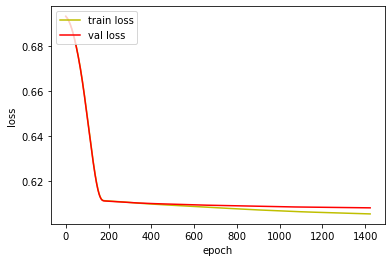

In [25]:


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [26]:
dic_labels = {}
for i in labels:
    if f'{i}' not in dic_labels.keys():
        dic_labels[f'{i}'] = 1
    else:
        dic_labels[f'{i}'] += 1

for key, value in dic_labels.items():
    print(f"{key}: {value}")

11.0: 180
3.0: 180
6.0: 180
1.0: 180
5.0: 180
4.0: 180
2.0: 180
10.0: 180
7.0: 180
9.0: 180
8.0: 180


In [27]:
labels_ = cluster_result.labels_ + 1
dic_labels_ = {}
for i in labels_:
    if f'{i}' not in dic_labels_.keys():
        dic_labels_[f'{i}'] = 1
    else:
        dic_labels_[f'{i}'] += 1

for key, value in dic_labels_.items():
    print(f"{key}: {value}")

3: 111
9: 128
2: 186
5: 285
6: 141
1: 303
11: 213
8: 245
10: 45
7: 202
4: 121


In [28]:
# 각 label 별 리스트 나누기
# labels : 기존 라벨
# all_feature : dataset

# labels == 1 인 인덱스 : idx
# cluster_1 = all_feature[idx]

for i in range(1, 12):
#     features = np.empty((1,32))
    indexes = []
    for idx, label in enumerate(labels):
        if label == i:
            indexes.append(idx)
    features = all_feature[indexes]
    result = cluster_result.predict(features)
    print(result)
#     print(features)
#     print(features.shape)

# 리스트 별로 predict 진행
# 결과 저장

[ 5  8  1  6  7  4  0  5  0  4  7  1  1  8  0  6  5  4  5  4  6  8  0  0
  5  5  7  8  8 10  5  5  7  5 10  1  7  4  6  5  0 10 10  5  3  6  0  7
  7  7  0  5 10  6  5  7  1  7  6  0  7  1  6  4 10  8  7 10  7  7  0  3
 10  0  7 10  6 10  7 10  6  0 10  1  1  6  8  5  5  0  0 10  4  6  4 10
  6  7  3  4 10  7  7  4  7  0 10  5  4  6  8  5  6  4  6 10  8  7  8  7
  7  8  5  6  5  7 10  7  4  7  7  7  8  8  5  1  5  5 10  7  1 10  7  0
  7  7  4  7  0  7 10  8  5  0  0  7 10  5  4  8  4  5  4  7  6 10  0  8
  2  1  8  4  6  7  2  8  1  6  4  0]
[ 2  6  2  0  5  6  3  8  9  1  0  3  5  2  2  6  3  9  2  0  6  0  7  3
  2  0  2  9  3  7  3 10  3  0  6  3  7  2  4  3  0  2 10  9  3 10  9  5
 10  3  7  9  5  0  9  3  9  5  2  9  2  2  6  3  6  2  6  7  3  1  5  6
  3  2  2  2  2  4  9  2  7  2  3  2  3  1  6  7  1  5  6  6  2  2  3  7
 10  2  6  6  3  5  1  0  1  5  6  5  6  3  7  2  6  2  0  6  1  1  3  7
  3  2  4  6 10  0  3  1  2  7  2  3  3  3  2  2  3  3  8  0  9  2  2  9
 10  3  2  3 

In [29]:
from sklearn.cluster import KMeans
# Cluster Algorithm
cluster_result = KMeans(n_clusters=11).fit(all_feature)

In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km.labels_)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_score(X, y_km.labels_,metric='euclidean')
    print(silhouette_vals)
data_list = np.array(data_list)
plotSilhouette(data_list,cluster_result)

-0.060034229488145366


In [41]:
array4 = array1.reshape(1, 3)  # [[1,2,3]]
array5 = array2.reshape(1, 3)  # [[4,5,6]]

# 2차원 배열을 위아래로 합치기

array6 = np.concatenate([array4, array5], axis=0)
print(array6.shape)
print(array6)


(6,)
[1 2 3 4 5 6]
---------------------------
(2, 3)
[[1 2 3]
 [4 5 6]]
---------------------------
(1, 6)
[[1 2 3 4 5 6]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 32